<a href="https://colab.research.google.com/github/KyeraFrancis/hack_a_dog/blob/main/Hack_a_dog_baseline_key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline HotDog Predictor model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10

In [2]:
!ls /content/drive/MyDrive/hotdog-nothotdog/

test  train


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the images from the mounted drive and creating test and train folders
Inspired by: [LucasEW](https://github.com/christianversloot/machine-learning-articles/blob/main/tutorial-building-a-hot-dog-not-hot-dog-classifier-with-tensorflow-and-keras.md)

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = plt.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

In [5]:
# Paths
test_hotdog_path = '/content/drive/MyDrive/hotdog-nothotdog/test/hotdog'
test_not_path = '/content/drive/MyDrive/hotdog-nothotdog/test/nothotdog'
train_hotdog_path = '/content/drive/MyDrive/hotdog-nothotdog/train/hotdog'
train_not_path = '/content/drive/MyDrive/hotdog-nothotdog/train/nothotdog'

# Load images
train_hotdog_images = load_images_from_folder(train_hotdog_path)
train_not_images = load_images_from_folder(train_not_path)
test_hotdog_images = load_images_from_folder(test_hotdog_path)
test_not_images = load_images_from_folder(test_not_path)

# Assign labels: 1 for 'hotdog', 0 for 'nothotdog'
train_labels = [1] * len(train_hotdog_images) + [0] * len(train_not_images)
test_labels = [1] * len(test_hotdog_images) + [0] * len(test_not_images)

# Combine images
train_images = train_hotdog_images + train_not_images
test_images = test_hotdog_images + test_not_images

print("Number of test images (hotdog):", len(test_hotdog_images))
print("Number of test images (nothotdog):", len(test_not_images))
print("Number of train images (hotdog):", len(train_hotdog_images))
print("Number of train images (nothotdog):", len(train_not_images))

Number of test images (hotdog): 322
Number of test images (nothotdog): 322
Number of train images (hotdog): 1500
Number of train images (nothotdog): 1486


In [6]:
# Pair each image with its label
train_data = list(zip(train_images, train_labels))
test_data = list(zip(test_images, test_labels))

print("Number of test images (hotdog):", len(test_hotdog_images))
print("Number of test images (nothotdog):", len(test_not_images))

Number of test images (hotdog): 322
Number of test images (nothotdog): 322


Numpy Array Transformation

In [7]:
# train test split
X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [8]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [9]:
y_test = np.array(y_test)

print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (2986, 299, 299, 3)
<class 'numpy.ndarray'> (2986,)
<class 'numpy.ndarray'> (644, 299, 299, 3)
<class 'numpy.ndarray'> (644,)


## Image Exploration

In [10]:
X_train[25]

array([[[0.32941177, 0.3529412 , 0.34509805],
        [0.34509805, 0.36862746, 0.36078432],
        [0.32941177, 0.3529412 , 0.34509805],
        ...,
        [0.6666667 , 0.67058825, 0.64705884],
        [0.6666667 , 0.67058825, 0.64705884],
        [0.6666667 , 0.67058825, 0.6509804 ]],

       [[0.34117648, 0.35686275, 0.3529412 ],
        [0.34509805, 0.36862746, 0.36078432],
        [0.35686275, 0.37254903, 0.36862746],
        ...,
        [0.6666667 , 0.67058825, 0.64705884],
        [0.6666667 , 0.67058825, 0.64705884],
        [0.6627451 , 0.6666667 , 0.64705884]],

       [[0.36078432, 0.36862746, 0.3647059 ],
        [0.34509805, 0.36078432, 0.35686275],
        [0.32941177, 0.3372549 , 0.33333334],
        ...,
        [0.6666667 , 0.67058825, 0.64705884],
        [0.6666667 , 0.67058825, 0.64705884],
        [0.6666667 , 0.67058825, 0.64705884]],

       ...,

       [[0.6745098 , 0.6784314 , 0.64705884],
        [0.6784314 , 0.68235296, 0.6509804 ],
        [0.6862745 , 0

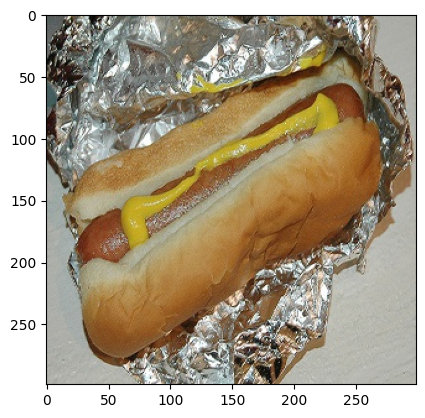

In [11]:
plt.imshow(X_train[25], cmap='binary');

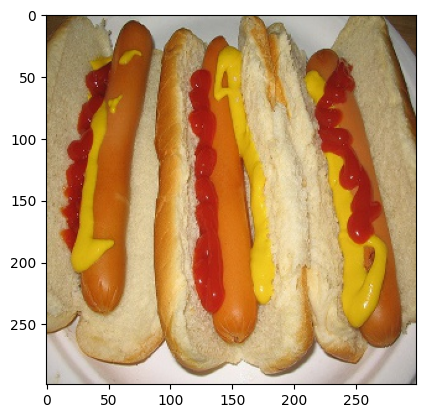

In [12]:
plt.imshow(X_test[0], cmap='binary');

## Model Preparation

### Baseline Model

In [13]:
def create_baseline_model(input_shape):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    #MaxPool the results
    model.add(MaxPooling2D((2, 2)))
    # Repeat
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output of the convolutional layers
    model.add(Flatten())

    # Dense layers for classification
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [14]:
input_shape = (299, 299, 3) # If we decide to change the res we can alter the model by updating the input shape

baseline_model = create_baseline_model(input_shape)
subset_size = 1000  # for example

# Randomly sample indices
subset_indices = np.random.choice(range(len(X_train)), subset_size, replace=False)

# Create subset
X_train_subset = X_train[subset_indices]
y_train_subset = y_train[subset_indices]

In [15]:
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 64)                2

In [17]:
history = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=5
)

Epoch 1/5
94/94 [==============================] - 10s 42ms/step - loss: 1.2439 - accuracy: 0.5610 - val_loss: 0.6385 - val_accuracy: 0.6584
Epoch 2/5
94/94 [==============================] - 2s 23ms/step - loss: 0.5874 - accuracy: 0.6942 - val_loss: 0.7500 - val_accuracy: 0.6040
Epoch 3/5
94/94 [==============================] - 2s 23ms/step - loss: 0.4499 - accuracy: 0.7974 - val_loss: 0.7526 - val_accuracy: 0.6708
Epoch 4/5
94/94 [==============================] - 2s 23ms/step - loss: 0.2892 - accuracy: 0.8845 - val_loss: 0.9239 - val_accuracy: 0.6196
Epoch 5/5
94/94 [==============================] - 2s 23ms/step - loss: 0.1432 - accuracy: 0.9474 - val_loss: 1.3574 - val_accuracy: 0.6320


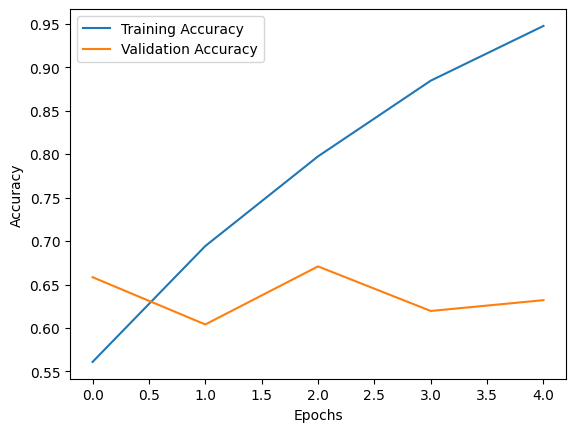

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/hotdog-nothotdog')

In [25]:
import pickle
# Write the pickled model to disk
with open('model.pkl', 'wb') as pickle_out:
    pickle.dump(baseline_model, pickle_out)

In [29]:
model_file_path = '/content/drive/MyDrive/hotdog-nothotdog/model.pkl'

# Write the pickled model to disk
with open(model_file_path, 'wb') as pickle_out:
    pickle.dump(baseline_model, pickle_out)

In [27]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /content
